<a href="https://colab.research.google.com/github/Eshitva/Fuel-Cell-Performance/blob/main/FuelCellPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.2 MB/s eta 0:00:00
   ━━━━

In [ ]:
import pandas as pd
from pycaret.regression import *


In [ ]:
file_path = '/content/Fuel_cell_performance_data-Full.csv'
data = pd.read_csv(file_path)

In [ ]:
target = 'Target2'
X = data.iloc[:, :-5]
y = data.iloc[:, -5:]
pycaret_data = pd.concat([X, y[target]], axis=1)

In [ ]:
regression_setup = setup(data=pycaret_data,target=target,session_id=42,normalize=True)

,Description,Value
0,Session id,42
1,Target,Target2
2,Target type,Regression
3,Original data shape,"(1000, 16)"
4,Transformed data shape,"(1000, 16)"
5,Transformed train set shape,"(700, 16)"
6,Transformed test set shape,"(300, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2592,0.0998,0.3155,0.6539,0.1408,0.2529,0.0240
lr,Linear Regression,0.2591,0.0998,0.3155,0.6537,0.1407,0.2521,0.4760
ridge,Ridge Regression,0.2591,0.0998,0.3155,0.6537,0.1407,0.2522,0.0260
lar,Least Angle Regression,0.2591,0.0998,0.3155,0.6537,0.1407,0.2521,0.0290
huber,Huber Regressor,0.2591,0.1008,0.3171,0.6497,0.1411,0.2504,0.0290
et,Extra Trees Regressor,0.2681,0.1072,0.3270,0.6275,0.1464,0.2641,0.3060
rf,Random Forest Regressor,0.2665,0.1069,0.3264,0.6274,0.1464,0.2635,0.8370
gbr,Gradient Boosting Regressor,0.2671,0.1080,0.3279,0.6250,0.1480,0.2664,0.3640
ada,AdaBoost Regressor,0.2906,0.1155,0.3396,0.6020,0.1532,0.2944,0.1560
lightgbm,Light Gradient Boosting Machine,0.2794,0.1196,0.3454,0.5842,0.1561,0.2782,0.3060


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
final_model = finalize_model(best_model)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y[target], test_size=0.3, random_state=42)
test_data = pd.concat([X_test, y_test], axis=1)
predictions = predict_model(final_model, data=test_data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.2655,0.1032,0.3212,0.6458,0.1430,0.2566


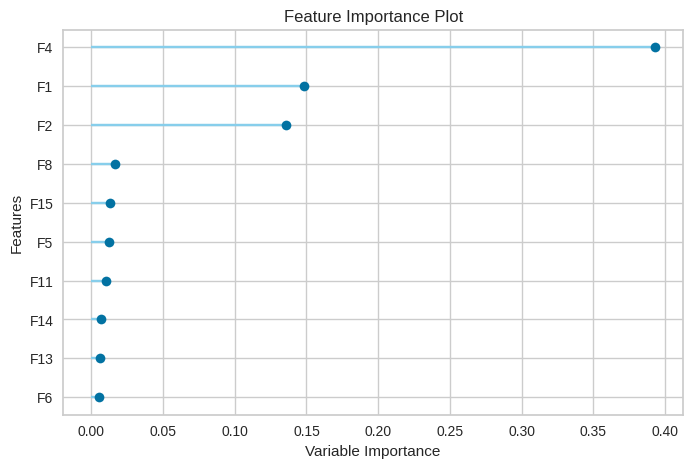

In [ ]:
plot_model(final_model, plot='feature')

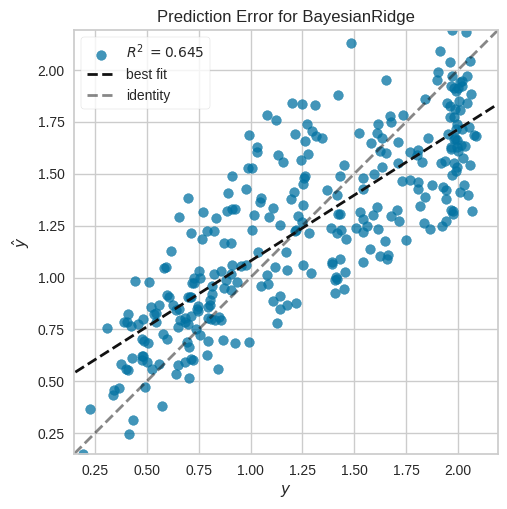

In [ ]:
plot_model(final_model, plot='error')

In [ ]:
save_model(final_model, 'best_model_Target2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['F1', 'F2', 'F3', 'F4', 'F5', 'F6',
                                              'F7', 'F8', 'F9', 'F10', 'F11',
                                              'F12', 'F13', 'F14', 'F15'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('actual_estimator', BayesianRidge())]),
 'best_model_Target2.pkl')